# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  **I am seeing that the most common property types are Apartments, Houses, Condos, and Lofts. These common property types are also joined by more niche properties like castles, boats, bungalows, huts, treehouses, villas and tents. Within smaller, single person or family property types like apartments, bungalows, townhouses, campers, boats, and lofts, it is more common for the etire property to be available for rent as opposed to a single room. On the other hand, in larger dwellings like houses, castles, and dorms, the offer will more likely be for a single private room.**
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  **For 'Price' the data has a severe left skew. The data is also logarithmic in nature. In examining the boxplot, we can see that the dramatic skew of the data is due to many outliers outside of the main unimodal cluster.**
  **For 'Price_log' the data's previous bad scaling has been corrected. We are still able to observe the outliers, however, the data is much more readable overall.**  
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  **The main pattern I am seeing is that as the number of beds increases, the price generally rises as well. However, for properties with 6 to 16 beds, the trend becomes less clear, probably due to extreme price outliers. The standard deviation, along the same lines, grows until 6 beds, after which it fluctuates significantly based on the number of beds.**
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  **The main pattern I am seeing in the 'Room Type' data is that the vast majority of the green dots representing shared rooms seem to be at the bottom, with most of the orange dots interspersed or right above, and the blue dots dominating the top half. This means that the room type with the highest prices are that where you are renting the entire property, followed by the rental of a private room, and the rental of a shared room being the cheapest. Rental of the entire property also seems to have the highest SD at 242.222346	as compared to a SD of 67.119678 for private room rental and a SD of 110.756196 for shared room rental. I would say that median is a more reliable estimate of central tendency, especially for private room rentals, as median is more resistant to outliers than mean and there are many outliers present in the data.**
  **The main pattern I am seeing in the 'Property Type' data is that apartment rental prices really run the gamut as far as pricing goes. I am also seeing house rentals being the main culprit of the beds available outlier. The 'Other' category for 'Property Type' has the highest SD by far at 696.663423. This makes sense to me as a wide variety of niche properties most likely fit into the other category and due to their wide range of differences, it would make sence that they also vary a lot in price. With this data, I would also conclude that median is a more reliable estimate of central tendency due to the many visible outliers, especially considering the variety in beds available.**
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?
  **The data is distributed mainly between price logs of 3.5 to 5.5 and 2 to 4 beds. This affects the way I view and think about the previous graphs as those properties in the 5 to 16 bed range and outside of the majority price log range were making a lot of noise as they were very visible. With this visualization of the data, we can see that a small minority of the data falls outside of the majority ranges.**

In [58]:
! rm -r /content/visualization/

In [59]:
! git clone https://github.com/annekuma/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 51 (delta 9), reused 2 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (51/51), 8.11 MiB | 12.02 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [10]:
import pandas as pd
df = pd.read_csv('/content/visualization/assignment/data/airbnb_hw.csv')

price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price

print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [11]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


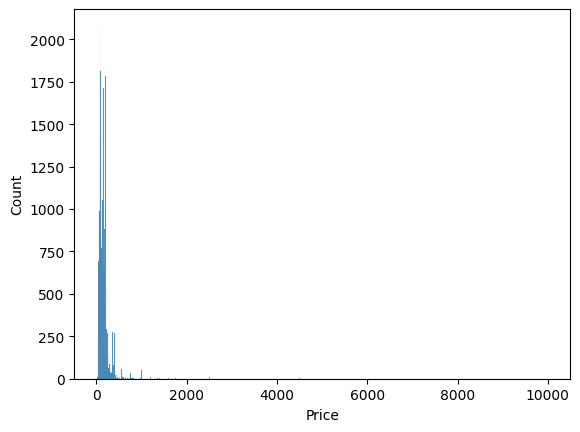

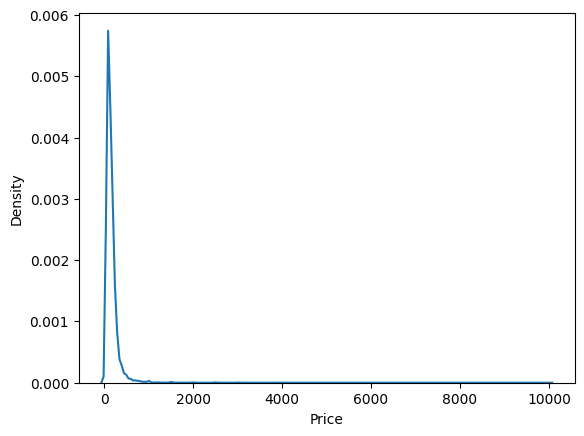

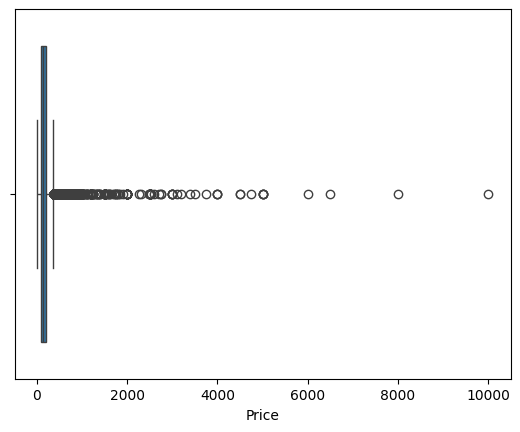

<Figure size 640x480 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df,x='Price')
plt.figure()
sns.kdeplot(data=df,x='Price')
plt.figure()
sns.boxplot(data=df,x='Price')
plt.figure()
df['Price'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


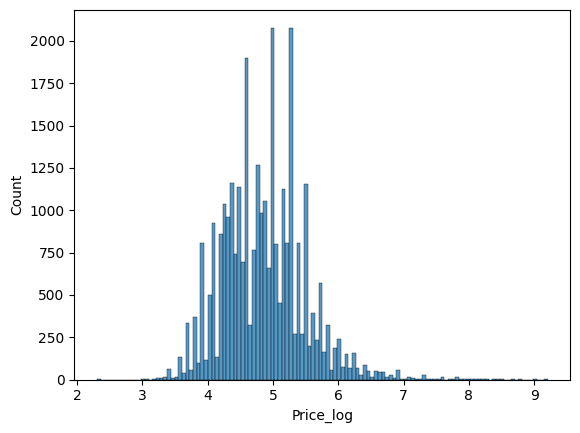

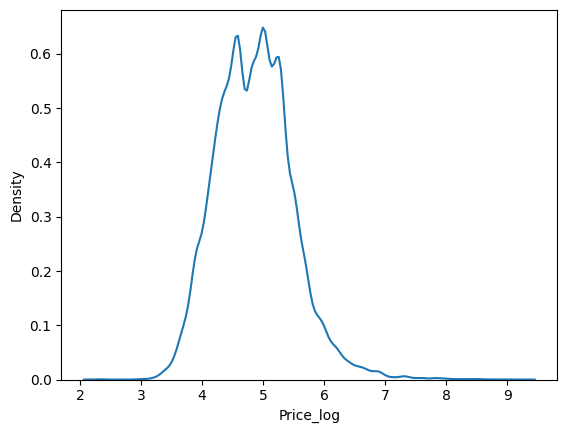

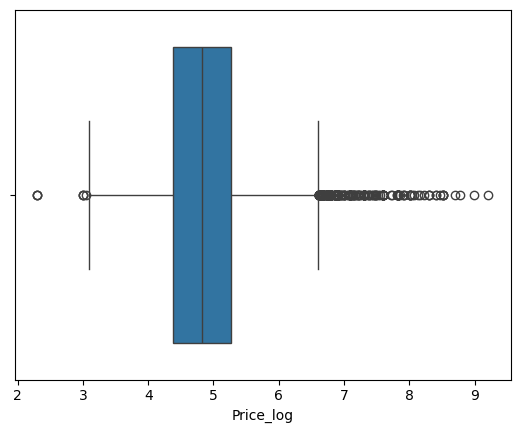

<Figure size 640x480 with 0 Axes>

In [19]:
import numpy as np
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')
plt.figure()
sns.kdeplot(data=df,x='Price_log')
plt.figure()
sns.boxplot(data=df,x='Price_log')
plt.figure()
df['Price_log'].describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

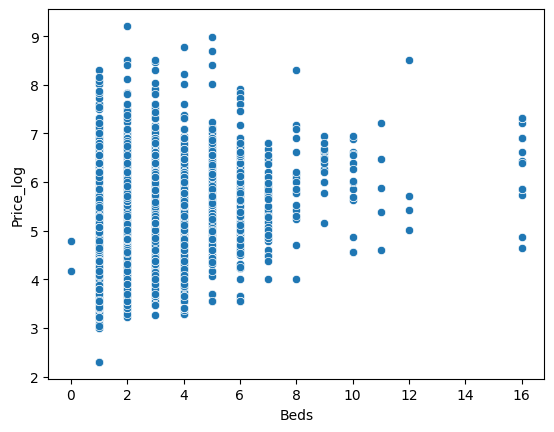

In [20]:
sns.scatterplot( data=df, x='Beds', y='Price_log')
df.loc[:,['Beds','Price']].groupby('Beds').describe()

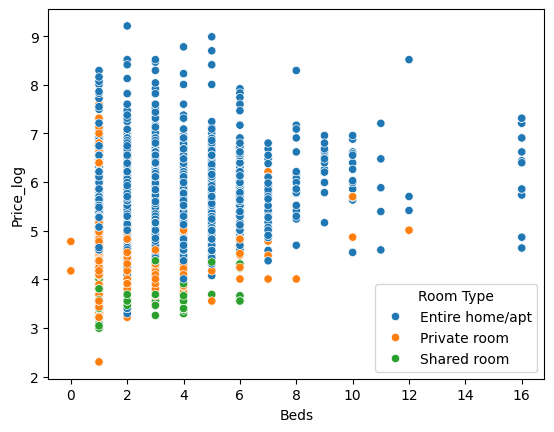

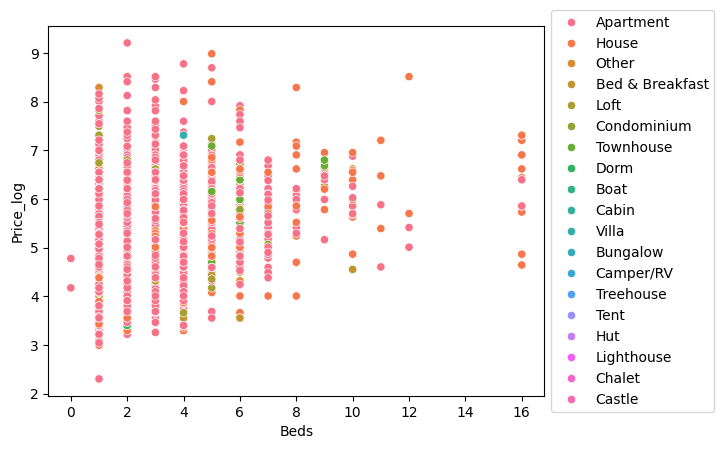

In [23]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')
plt.figure()
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Property Type')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [24]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [25]:
var = 'Price'
group = 'Property Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

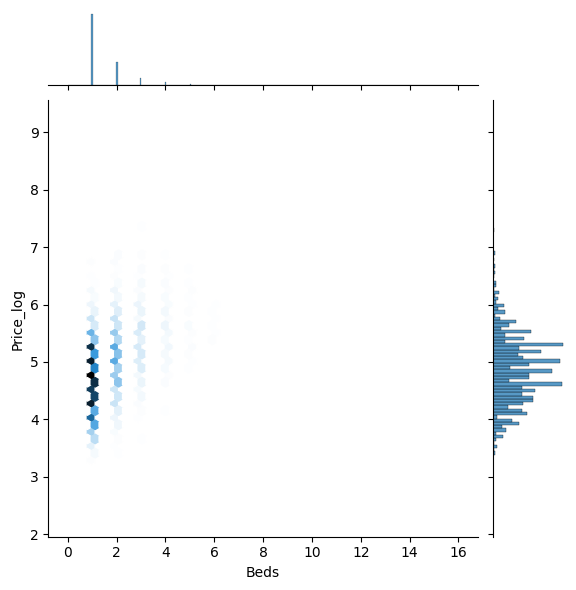

In [26]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
**The data dictionary does not document how missings are handled. There are not many categorical variables, however there are some that are listed to be 'Y' or 'N'. Missing value codes are not listed. For numeric variables, it does not describe how missing values are handled. Though the dictionary does not speak to missing values and what is done in those cases, the descriptions of the variables and what what type of variable each column includes is very well done.**
**In my cleaning of the data I made a big decision early on to only include a single week of the whole dataset as it was over 600 MBs to begin with. This reduction made the data a lot more managable and allowed my code to actually run. I also chose to put the three variables I want to study into a new dataframe called 'cleaned'.**
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
**The variables I picked were Residents Weekly Confirmed COVID-
19, Residents Weekly COVID-19 Deaths, and Residents Weekly All Deaths. This is a fairly morbid topic but I was interested in observing the relationship between how many residents tested positive for covid and passed away from it as well as how that rate compared to the overall deaths of that week.**
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
**I do see some outliers on each of the three box plots that cause each to be skewed to the left.**
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
**From the histograms of resident weekly confirmed covid and resident weekly deaths, I cannot tell much due to the extreme outliers making the scale very large. From the histogram of resident weekly covid deaths, I am able to see that the vast majority of facilities had between 0 and 4 deaths of residents due to covid in the week of 5/24/2020. The other two graphs desperately need transformations to be readable.**
7. Create a scatter plot, and describe the relationship you see.
**In the graph of Residents Weekly Confirmed COVID-19 and Residents Weekly COVID-19 Deaths, there appears to be a  weak positive correlation between the two variables. For the scatterplot of Residents Weekly COVID-19 Deaths and Residents Weekly All Deaths, there is a stronger positive correlation between the variables. However, in this scatterplot, there are some severe outliers that skew the scale of the plot.**
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.
**In the table of all weekly deaths per weekly covid death, as the weekly covid deaths increase, the count drastically decreases, the mean steadily increases, and the SD stayes relatively steady with a few fluctuations. The minimum stayed at 0 until the weekly covid deaths reached 15 and then was consistently over one. The maximum was all over the charts, showing no correlation.**

In [60]:
df = pd.read_csv('/content/visualization/assignment/data/COVID-19_Nursing_Home_Data_First_Week.csv')

In [66]:
print(df['Residents Weekly Confirmed COVID-19'].head(10))

0    45.0
1     0.0
2     1.0
3     0.0
4     0.0
5     0.0
6     2.0
7     0.0
8     0.0
9     0.0
Name: Residents Weekly Confirmed COVID-19, dtype: float64


<Axes: xlabel='Residents Weekly All Deaths'>

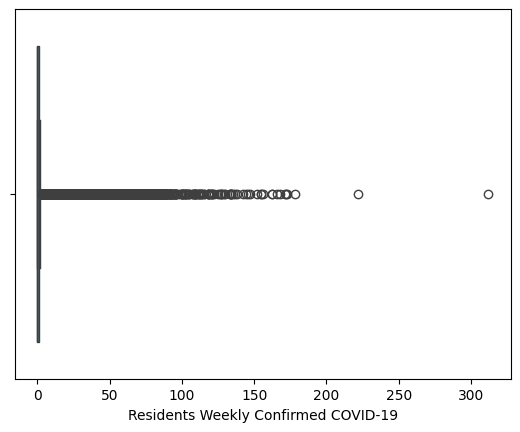

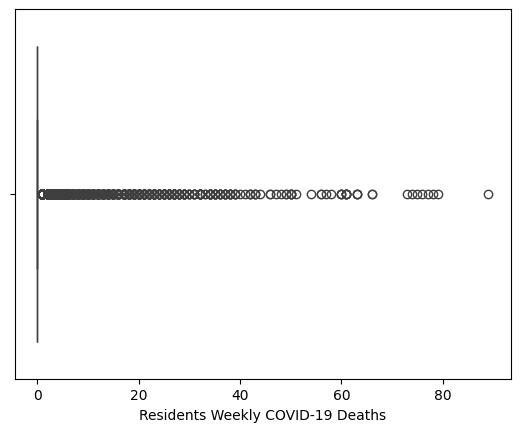

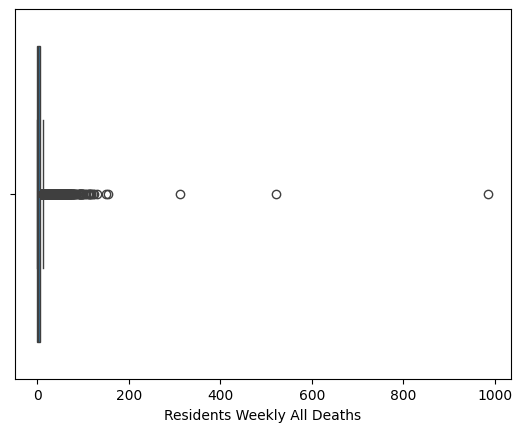

In [72]:
cleaned = df[['Provider Name', 'Provider State', 'Residents Weekly Confirmed COVID-19', 'Residents Weekly COVID-19 Deaths', 'Residents Weekly All Deaths']]
sns.boxplot(data=df,x='Residents Weekly Confirmed COVID-19')
plt.figure()
sns.boxplot(data=df,x='Residents Weekly COVID-19 Deaths')
plt.figure()
sns.boxplot(data=df,x='Residents Weekly All Deaths')

<Axes: xlabel='Residents Weekly All Deaths', ylabel='Count'>

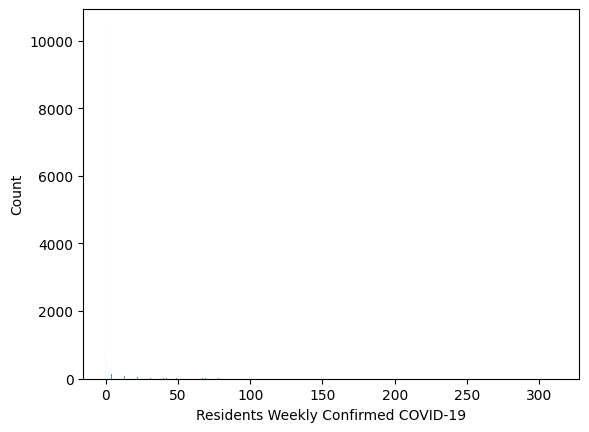

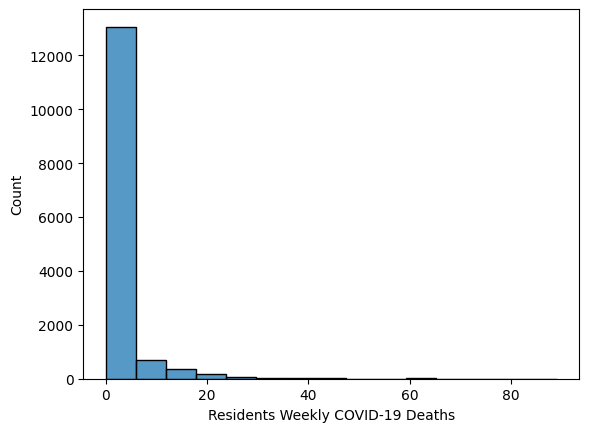

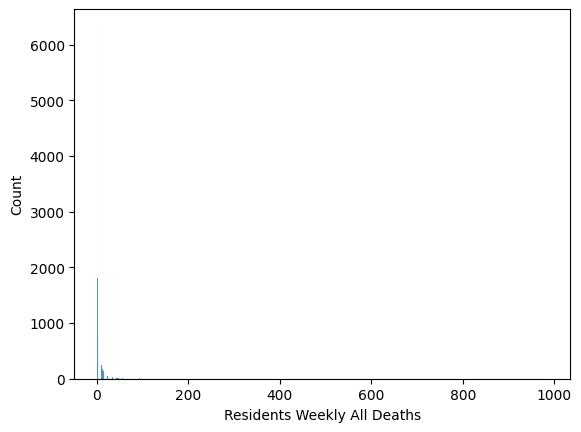

In [73]:
sns.histplot(data=df,x='Residents Weekly Confirmed COVID-19')
plt.figure()
sns.histplot(data=df,x='Residents Weekly COVID-19 Deaths')
plt.figure()
sns.histplot(data=df,x='Residents Weekly All Deaths')

<Axes: xlabel='Residents Weekly COVID-19 Deaths', ylabel='Residents Weekly All Deaths'>

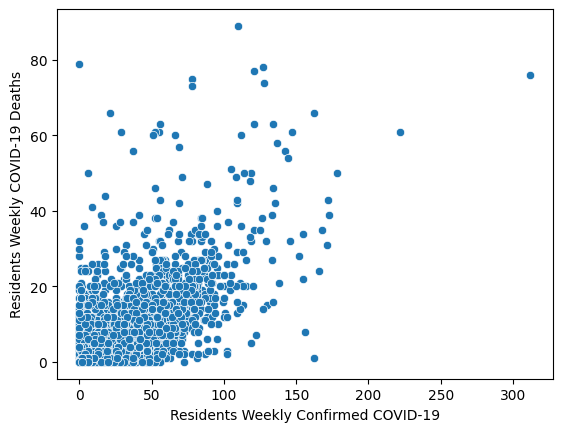

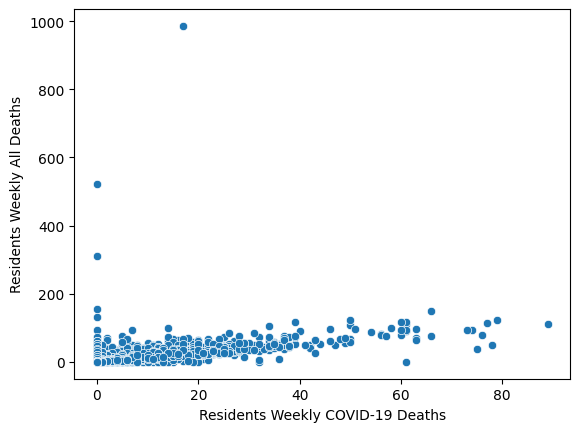

In [74]:
sns.scatterplot(data=df,x='Residents Weekly Confirmed COVID-19',y='Residents Weekly COVID-19 Deaths')
plt.figure()
sns.scatterplot(data=df,x='Residents Weekly COVID-19 Deaths',y='Residents Weekly All Deaths')

In [83]:
df.loc[:,['Residents Weekly COVID-19 Deaths','Residents Weekly All Deaths']].groupby('Residents Weekly COVID-19 Deaths').describe().head(30)

Residents Weekly All Deaths             \
                                                       count       mean   
Residents Weekly COVID-19 Deaths                                          
0.0                                                  11356.0   2.598714   
1.0                                                    623.0   4.059390   
2.0                                                    375.0   5.301333   
3.0                                                    290.0   7.096552   
4.0                                                    231.0   7.523810   
5.0                                                    192.0   9.843750   
6.0                                                    162.0  11.524691   
7.0                                                    108.0  12.685185   
8.0                                                    114.0  13.771930   
9.0                                                    112.0  12.642857   
10.0                                                   102.0  14.196078   
11.0                                                    84.0  17.845238   
12.0                                                    78.0  17.641026   
13.0                                                    81.0  17.962963   
14.0                                                    58.0  24.689655   
15.0                                                    55.0  22.890909   
16.0                                                    57.0  24.789474   
17.0                                                    48.0  44.083333   
18.0                                                    44.0  25.227273   
19.0                                                    37.0  27.783784   
20.0                                                    39.0  31.179487   
21.0                                                    23.0  25.739130   
22.0                                                    24.0  30.791667   
23.0                                                    23.0  33.608696   
24.0                                                    14.0  33.928571   
25.0                                                    16.0  38.437500   
26.0                                                    16.0  36.625000   
27.0                                                    15.0  33.600000   
28.0                                                     9.0  42.444444   
29.0                                                     8.0  42.250000   

                                                                               
                                         std   min    25%   50%    75%    max  
Residents Weekly COVID-19 Deaths                                               
0.0                                 8.037288   0.0   0.00   0.0   2.00  522.0  
1.0                                 5.879662   0.0   1.00   2.0   4.00   51.0  
2.0                                 7.326778   0.0   2.00   3.0   5.00   71.0  
3.0                                 7.262097   0.0   3.00   4.0   7.00   44.0  
4.0                                 5.469130   0.0   4.00   5.0   9.00   34.0  
5.0                                 9.167811   0.0   5.00   7.0  10.00   77.0  
6.0                                 9.398163   0.0   6.00   9.0  13.00   66.0  
7.0                                11.143623   0.0   8.00   9.0  14.00   95.0  
8.0                                 8.855812   0.0   8.00  10.0  17.00   51.0  
9.0                                 7.217168   0.0   9.00  11.0  15.00   41.0  
10.0                                7.534790   0.0  10.00  12.0  15.00   56.0  
11.0                                9.188120   0.0  12.00  14.0  21.25   49.0  
12.0                                9.688625   0.0  12.00  15.0  20.75   52.0  
13.0                                8.283182   0.0  14.00  16.0  21.00   42.0  
14.0                               16.718733   0.0  15.00  19.0  27.75   99.0  
15.0                               12.065673   1.0  16.50  19.0  25.00   66.0  
16.0                               10